In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv(r'C:\Users\khursheed alam\Downloads\Data Science Intern\IRIS.csv')

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***Data Cleaning Process***

In [53]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [54]:
df.duplicated().sum()

3

In [55]:
df = df.drop_duplicates()

In [56]:
# df.duplicated().sum()

***Exploratory Data Analysis(EDA)***

In [57]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

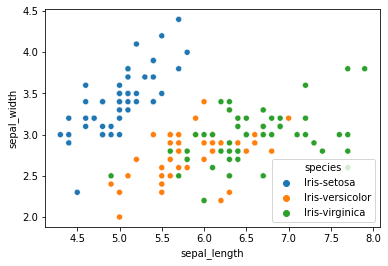

In [58]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species")
plt.show()

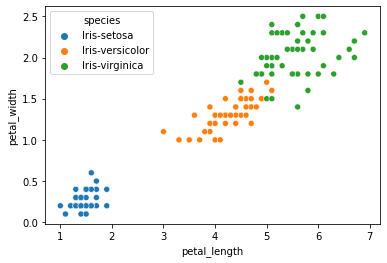

In [59]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species")
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [61]:
df['species'] = label_encoder.fit_transform(df['species'])

In [62]:
df.corr().style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


In [63]:
X = df.drop('species', axis=1)
y = df['species']

**Splitting the data into Train and Test**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Importing Libraries***

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Initializing the models**

In [68]:

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
}

***Train and evaluate models***

In [69]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 40)

Logistic Regression Accuracy: 0.9778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]
----------------------------------------
K-Nearest Neighbors Accuracy: 0.9556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
----------------------------------------
Support 

**Model Comparison**

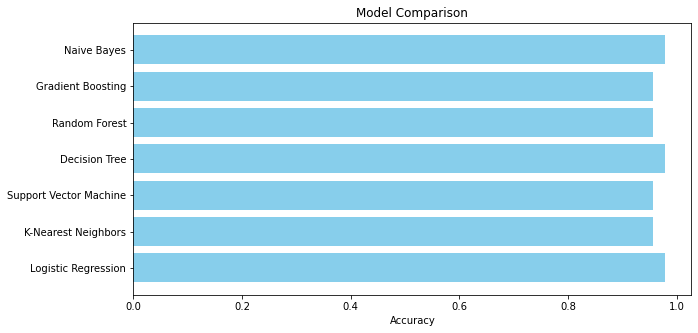

In [70]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
model_scores = list(results.values())

plt.figure(figsize=(10, 5))
plt.barh(model_names, model_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()